In [7]:
from pathlib import Path
from datetime import datetime
from utils.terminal_stream import TerminalStream
from utils.nethackboost import NetHackBoost
from utils.nle_metrics import NetHackMetricsEnv
import pandas as pd
import matplotlib.pyplot as plt
from collections import namedtuple
import random
import sys
import numpy as np
import re
import string
import gym

In [8]:
import pandas as pd
from pathlib import Path
import sys
from multiprocessing import Pool
import matplotlib.pyplot as plt

In [9]:
def summarize_episode(episode_dir):
    episode_df = pd.read_csv(episode_dir / 'stats.csv')
    return (
        episode_dir.stem,
        {
            'total_reward': episode_df['rewards'].iloc[:-1].sum(),
            'total_timesteps': episode_df['time'].iloc[:-1].max(), 
            'max_depth': episode_df['depth'].iloc[:-1].max(),
            'max_score': episode_df['score'].iloc[:-1].max(),
            'max_gold': episode_df['gold'].iloc[:-1].max(),
            'max_xp': episode_df['experience_points'].iloc[:-1].max(),
        }
    )

In [17]:
folder = Path('IMPALA-val-dwa-base-base-v1')
episode_dirs = [x for x in folder.iterdir() if x.is_dir()]
with Pool(12) as p:
    episode_summary_list = p.map(summarize_episode, episode_dirs)
episode_dict = {episode_name: episode_summary for episode_name, episode_summary in episode_summary_list}
episodes_df = pd.DataFrame(episode_dict).T
episodes_df

,total_reward,total_timesteps,max_depth,max_score,max_gold,max_xp
19-36-48-886246,4.0,226.0,1.0,4.0,4.0,0.0
19-38-03-276083,7.0,259.0,1.0,7.0,7.0,0.0
19-32-41-441676,0.0,39.0,1.0,7.0,7.0,0.0
19-37-07-727102,42.0,1169.0,1.0,42.0,0.0,6.0
19-36-26-197448,0.0,60.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
19-41-22-570309,98.0,1000.0,2.0,98.0,10.0,6.0
19-31-12-394106,0.0,1.0,1.0,0.0,0.0,0.0
19-30-09-263749,0.0,114.0,1.0,0.0,0.0,0.0
19-39-10-761740,0.0,214.0,1.0,0.0,0.0,0.0


In [ ]:
episodes_df.index = pd.to_datetime(episodes_df.index, format='%H-%M-%S-%f')

In [14]:
episodes_df.sort_index()

,total_reward,total_timesteps,max_depth,max_score,max_gold,max_xp
1900-01-01 19:27:01.673309,0.0,255.0,1.0,3.0,3.0,0.0
1900-01-01 19:27:01.720613,0.0,96.0,1.0,3.0,3.0,0.0
1900-01-01 19:27:01.720614,-3.0,258.0,1.0,3.0,3.0,0.0
1900-01-01 19:27:01.757587,0.0,135.0,1.0,3.0,3.0,0.0
1900-01-01 19:27:01.758141,-2.0,577.0,1.0,3.0,3.0,0.0
...,...,...,...,...,...,...
1900-01-01 19:41:56.474264,10.0,56.0,1.0,10.0,0.0,0.0
1900-01-01 19:41:58.945124,13.0,209.0,1.0,13.0,3.0,0.0
1900-01-01 19:42:03.292381,4.0,187.0,1.0,4.0,0.0,1.0
1900-01-01 19:42:09.042330,2.0,79.0,1.0,2.0,2.0,0.0


In [19]:
episodes_df = episodes_df.reset_index()

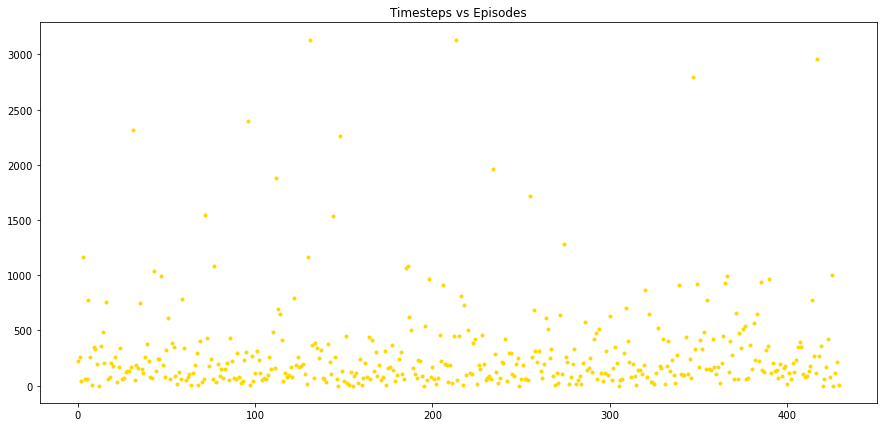

In [27]:
figsize = (15,7)
plt.figure(figsize=figsize)
plt.scatter(episodes_df.index - episodes_df.index[0], episodes_df['total_timesteps'], marker='.', color='gold')
plt.title(f'Timesteps vs Episodes')
plt.show()

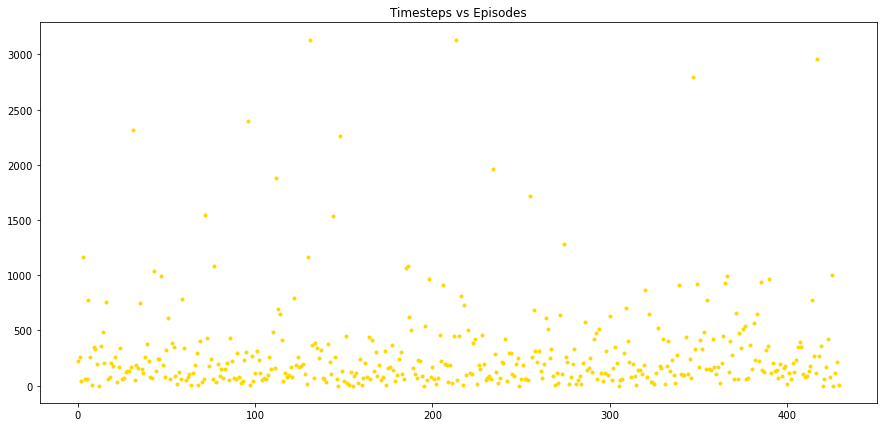

In [28]:
plt.style.context('seaborn-darkgrid')
figsize = (15,7)
plt.figure(figsize=figsize)
plt.scatter(episodes_df.index - episodes_df.index[0], episodes_df['total_timesteps'], marker='.', color='gold')
plt.title(f'Timesteps vs Episodes')
plt.show()